<a href="https://colab.research.google.com/github/Habibawally/MyGithup/blob/projectss/Recognition_of_human_activity_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, TimeDistributed

# Mount Google Drive if dataset is stored there (optional)
from google.colab import drive
drive.mount('/content/drive')  # Uncomment if needed

# Unzip and Load Dataset
base_path = '/content/drive/MyDrive/Dataset/UCI(Dataset)'  # Update this path as per your folder structure


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime, os
from sklearn import preprocessing
import numpy as np

#Dividir el DF
from sklearn.model_selection import train_test_split
#Para las redes neuronales

from keras.models import Model, load_model, Sequential
from keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Bidirectional, GRU, Dense,Dropout
from tensorflow.keras import optimizers

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model, Sequential
from keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Bidirectional, GRU, Dense, Dropout
import matplotlib.pyplot as plt

# Labels for classification
LABELS = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

# Define signal types
SIGNALS = ["body_acc_x_", "body_acc_y_", "body_acc_z_",
           "body_gyro_x_", "body_gyro_y_", "body_gyro_z_",
           "total_acc_x_", "total_acc_y_", "total_acc_z_"]

# Modify the paths according to where your dataset is stored on Google Drive
train_paths = ['/content/drive/MyDrive/UCI HAR Dataset/train/Inertial Signals/' + signal + 'train.txt' for signal in SIGNALS]
test_paths = ['/content/drive/MyDrive/UCI HAR Dataset/test/Inertial Signals/' + signal + 'test.txt' for signal in SIGNALS]

# Function to load signal data from files
def load_signals(file_paths):
    X_signals = []
    for signal in file_paths:
        with open(signal, 'r') as file:
            data = []
            for line in file:
                # Clean and split the line
                cleaned_line = line.strip()
                if cleaned_line:  # Skip empty lines
                    data.append([float(x) for x in cleaned_line.split() if x])  # Skip empty values
            X_signals.append(data)
    return np.transpose(np.array(X_signals), (1, 2, 0))

# Load training and testing data
x_train = load_signals(train_paths)
x_test = load_signals(test_paths)

# Load labels for training and testing
train_labels_path = '/content/drive/MyDrive/UCI HAR Dataset/train/y_train.txt'
test_labels_path = '/content/drive/MyDrive/UCI HAR Dataset/test/y_test.txt'

y_train = np.loadtxt(train_labels_path, dtype=np.int32) - 1  # Subtract 1 for zero-based indexing
y_test = np.loadtxt(test_labels_path, dtype=np.int32) - 1

# Input dimension
input_dim = x_train.shape
print("Input dimensions for model:", input_dim[1:])



Input dimensions for model: (128, 9)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_layer (InputLayer)             │ (None, 128, 9)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128, 256)            │         106,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_layer_3 (GRU)                │ (None, 50)                  │          46,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeatVector_layer (RepeatVector)    │ (None, 128, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_layer_1 (GRU)                │ (None, 128, 50)             │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_layer_2 (GRU)                │ (None, 128, 128)            │          69,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (TimeDistributed)       │ (None, 128, 9)              │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,533 (931.77 KB)

 Trainable params: 238,533 (931.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.6103 - loss: 0.1453 - val_accuracy: 0.7735 - val_loss: 0.0733
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 250ms/step - accuracy: 0.7842 - loss: 0.0754 - val_accuracy: 0.8947 - val_loss: 0.0609
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 0.8449 - loss: 0.0640 - val_accuracy: 0.9030 - val_loss: 0.0577
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 0.8951 - loss: 0.0615 - val_accuracy: 0.9371 - val_loss: 0.0544
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step - accuracy: 0.9291 - loss: 0.0585 - val_accuracy: 0.9378 - val_loss: 0.0520
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 0.9326 - loss: 0.0559 - val_accuracy: 0.9373 - val_loss: 0.0505
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step - accuracy: 0.9332 - loss: 0.0576 - val_accuracy: 0.9413 - val_loss: 0.0497
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 253ms/step - accuracy: 0.9357 - loss: 0.0543 - val_accur

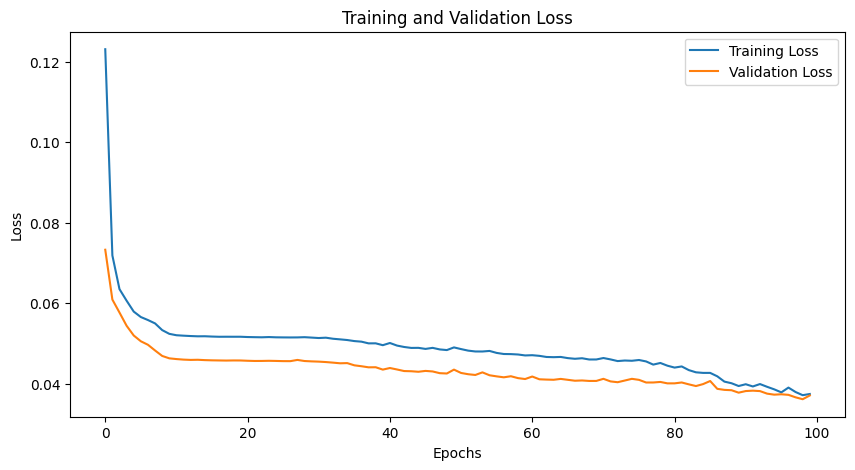

230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Define the Autoencoder Model
input_layer = Input(shape=(input_dim[1:]), name='Input_layer')

# Encoder - Compress the input into a smaller representation or latent space
layer_1 = Bidirectional(GRU(128, activation='relu', return_sequences=True, name='encoder_layer_2'))(input_layer)
layer_2 = GRU(50, activation='relu', return_sequences=False, name='encoder_layer_3')(layer_1)

# Bottleneck - Reduced representation of the data that captures the most relevant information
layer_3 = RepeatVector(x_train.shape[1], name='repeatVector_layer')(layer_2)

# Decoder - Expands the latent space back to the original input dimensions
layer_4 = GRU(50, activation='relu', return_sequences=True, name='decoder_layer_1')(layer_3)
layer_5 = GRU(128, activation='relu', return_sequences=True, name='decoder_layer_2')(layer_4)
output_layer = TimeDistributed(Dense(input_dim[2]), name='output_layer')(layer_5)

# Model
model_GRU = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model_GRU.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Summary
model_GRU.summary()

# Define EarlyStopping to prevent overfitting
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

# Train the Autoencoder model
encoder_decoder_history = model_GRU.fit(
    x_train, x_train,  # Autoencoder learns to reconstruct its input
    batch_size=512,  # Batch size for training
    epochs=100,  # Number of epochs to train
    validation_data=(x_test, x_test),  # Use the test set for validation
    callbacks=[early_stop]  # Apply early stopping during training
)

# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(encoder_decoder_history.history['loss'], label='Training Loss')
plt.plot(encoder_decoder_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Extract Latent Features from Encoder (after training)
encoder = Model(inputs=input_layer, outputs=layer_2)
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Extract Latent Features from Encoder (after training)
encoder = Model(inputs=input_layer, outputs=layer_2)
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

# Display the encoded shapes
print(f"Encoded X_train shape is: {x_train_encoded.shape}")
print(f"Encoded X_test shape is: {x_test_encoded.shape}")

# Define RandomForest Classifier
def rf(x_train, y_train, n_estimators=300):
    rndforest = RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1)
    rndforest.fit(x_train, y_train)
    return rndforest

230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Encoded X_train shape is: (7352, 50)
Encoded X_test shape is: (2947, 50)


In [ ]:
# Train RandomForest classifier
random_forest_en = rf(x_train_encoded, y_train, n_estimators=300)

# Print training and validation accuracy
print("Training accuracy:", random_forest_en.score(x_train_encoded, y_train))
print("Validation accuracy", random_forest_en.score(x_test_encoded, y_test))

Training accuracy: 1.0
Validation accuracy 0.8568035290125552


MATRIZ DE CONFUSIÓN


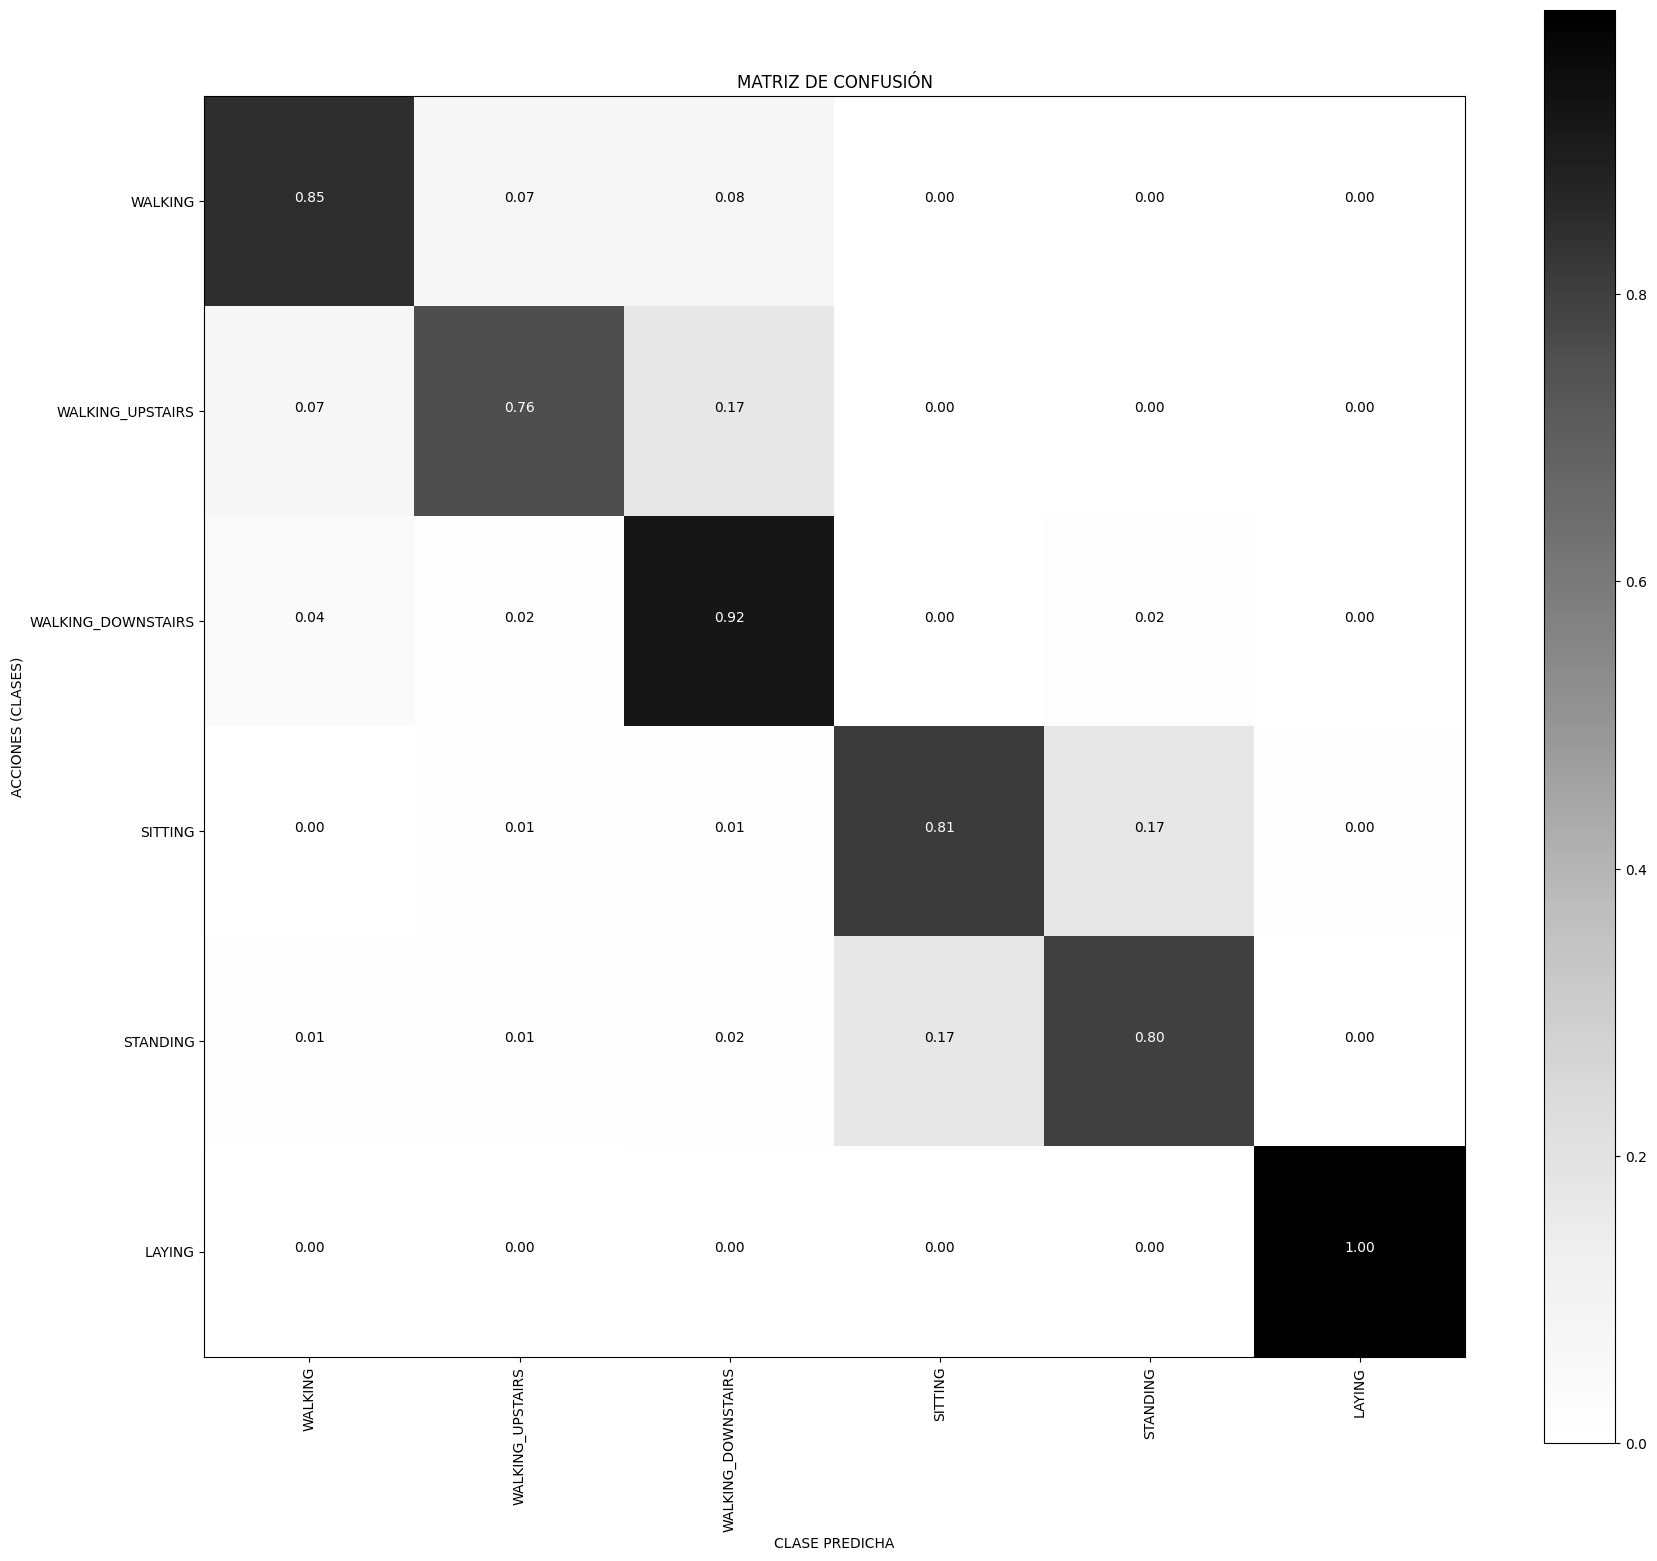

In [ ]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

# Define the confusion matrix plotting function
def plot_confusion_matrix(model, X, y, class_names, file_name,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    y_pred = model.predict(X)
    # Compute confusion matrix
    cnf_matrix  = confusion_matrix(y, y_pred)
    np.set_printoptions(precision=1)
    plt.figure(figsize=(18, 16))

    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("MATRIZ DE CONFUSIÓN")
    else:
        print('MATRIZ DE CONFUSIÓN')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    plt.title('MATRIZ DE CONFUSIÓN')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.ylabel('ACCIONES (CLASES)')
    plt.xlabel('CLASE PREDICHA')
    plt.tight_layout()
    plt.savefig(file_name+'.png')
    plt.show()

# Assuming you have the encoded test set `x_test_encoded`
# If you're using the original `x_test`, pass that instead of `x_test_encoded`
plot_confusion_matrix(random_forest_en, x_test_encoded, y_test,
                      class_names=LABELS,
                      file_name='ConfusionMatrix',
                      normalize=True)


#DAE



Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_layer (InputLayer)             │ (None, 128, 9)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_18 (Bidirectional)     │ (None, 128, 256)            │         106,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_layer_3 (GRU)                │ (None, 50)                  │          46,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeatVector_layer (RepeatVector)    │ (None, 128, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_layer_1 (GRU)                │ (None, 128, 50)             │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_layer_2 (GRU)                │ (None, 128, 128)            │          69,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (TimeDistributed)       │ (None, 128, 9)              │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,533 (931.77 KB)

 Trainable params: 238,533 (931.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5920 - loss: 0.1515 - val_accuracy: 0.7735 - val_loss: 0.0795
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 238ms/step - accuracy: 0.7908 - loss: 0.0783 - val_accuracy: 0.8849 - val_loss: 0.0646
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 256ms/step - accuracy: 0.8348 - loss: 0.0679 - val_accuracy: 0.9254 - val_loss: 0.0616
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.8855 - loss: 0.0653 - val_accuracy: 0.9036 - val_loss: 0.0601
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - accuracy: 0.8661 - loss: 0.0632 - val_accuracy: 0.9346 - val_loss: 0.0584
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - accuracy: 0.9202 - loss: 0.0622 - val_accuracy: 0.9335 - val_loss: 0.0555
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step - accuracy: 0.9275 - loss: 0.0584 - val_accuracy: 0.9387 - val_loss: 0.0538
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 272ms/step - accuracy: 0.9299 - loss: 0.0580 - val_accura

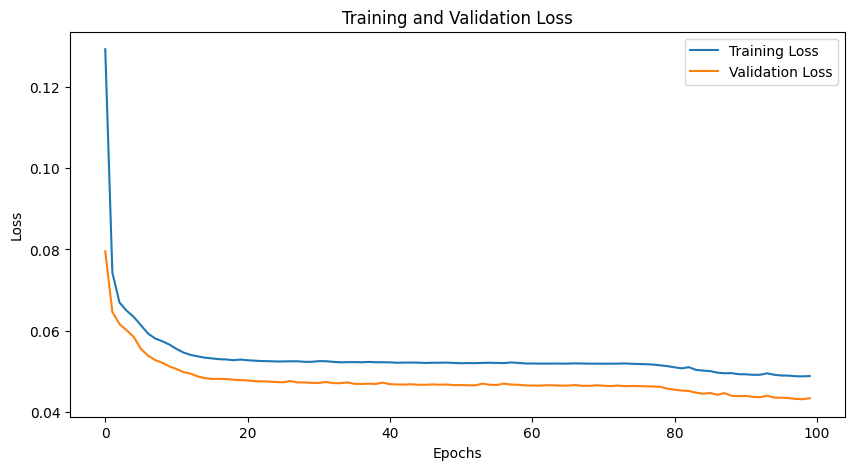

230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, GRU, Bidirectional, RepeatVector, TimeDistributed, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

# Define the function to add noise to the input data
def add_noise(data, noise_factor=0.2):
    """Adds random noise to the input data to create noisy versions."""
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = np.clip(noisy_data, 0., 1.)  # Ensure values are within [0, 1] range
    return noisy_data

# Add noise to the training and testing data
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# Define the Denoising Autoencoder Model
input_layer = Input(shape=(input_dim[1:]), name='Input_layer')

# Encoder - Compress the input into a smaller representation or latent space
layer_1 = Bidirectional(GRU(128, activation='relu', return_sequences=True, name='encoder_layer_2'))(input_layer)
layer_2 = GRU(50, activation='relu', return_sequences=False, name='encoder_layer_3')(layer_1)

# Bottleneck - Reduced representation of the data that captures the most relevant information
layer_3 = RepeatVector(x_train.shape[1], name='repeatVector_layer')(layer_2)

# Decoder - Expands the latent space back to the original input dimensions
layer_4 = GRU(50, activation='relu', return_sequences=True, name='decoder_layer_1')(layer_3)
layer_5 = GRU(128, activation='relu', return_sequences=True, name='decoder_layer_2')(layer_4)
output_layer = TimeDistributed(Dense(input_dim[2]), name='output_layer')(layer_5)

# Model
model_GRU = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model_GRU.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Summary
model_GRU.summary()

# Define EarlyStopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

# Train the Denoising Autoencoder model with noisy input data
encoder_decoder_history = model_GRU.fit(
    x_train_noisy, x_train,  # Train the model with noisy input, but original target
    batch_size=512,  # Batch size for training
    epochs=100,  # Number of epochs to train
    validation_data=(x_test_noisy, x_test),  # Validate using noisy input, but original target
    callbacks=[early_stop]  # Apply early stopping during training
)

# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(encoder_decoder_history.history['loss'], label='Training Loss')
plt.plot(encoder_decoder_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Extract Latent Features from Encoder (after training)
encoder = Model(inputs=input_layer, outputs=layer_2)
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)


#Compare

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5843 - loss: 0.1556 - val_accuracy: 0.7735 - val_loss: 0.0825
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 250ms/step - accuracy: 0.7861 - loss: 0.0767 - val_accuracy: 0.8875 - val_loss: 0.0622
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.8587 - loss: 0.0649 - val_accuracy: 0.8985 - val_loss: 0.0583
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 240ms/step - accuracy: 0.8658 - loss: 0.0625 - val_accuracy: 0.9334 - val_loss: 0.0555
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 260ms/step - accuracy: 0.9295 - loss: 0.0593 - val_accuracy: 0.9380 - val_loss: 0.0522
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 270ms/step - accuracy: 0.9345 - loss: 0.0571 - val_accuracy: 0.9380 - val_loss: 0.0508
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 240ms/step - accuracy: 0.9349 - loss: 0.0576 - val_accuracy: 0.9381 - val_loss: 0.0499
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 301ms/step - accuracy: 0.9361 - loss: 0.0554 - val_accura

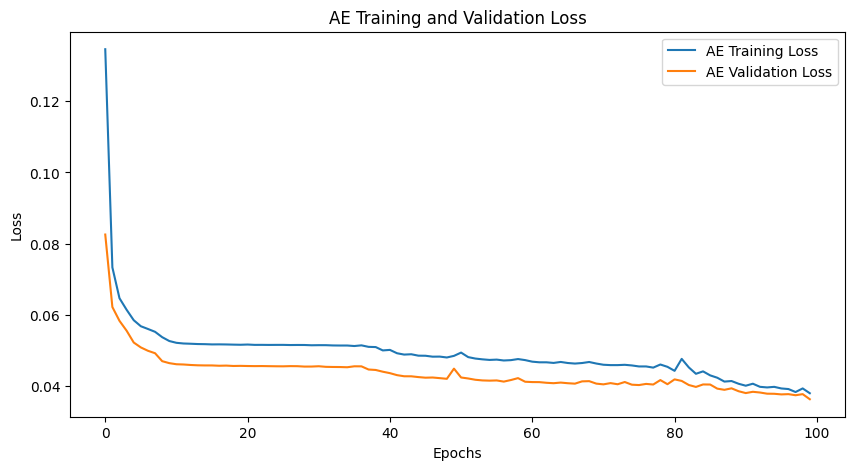

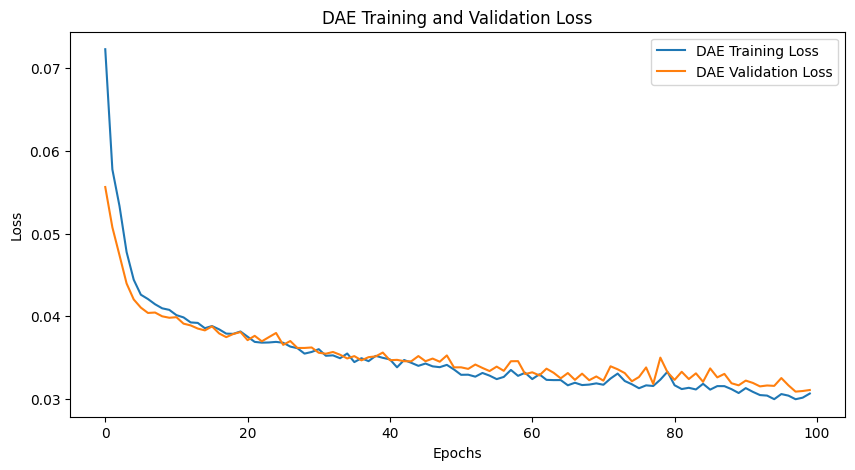

230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
AE Classification Accuracy: 85.78%
DAE Classification Accuracy: 88.63%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, GRU, Bidirectional, RepeatVector, TimeDistributed, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Function to add noise to the input data for Denoising Autoencoder
def add_noise(data, noise_factor=0.2):
    """Adds random noise to the input data to create noisy versions."""
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = np.clip(noisy_data, 0., 1.)  # Ensure values are within [0, 1] range
    return noisy_data

# Add noise to the training and testing data for Denoising Autoencoder
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# --- Define Autoencoder Model (AE) ---
input_layer = Input(shape=(input_dim[1:]), name='Input_layer')

# Encoder - Compress the input into a smaller representation or latent space
layer_1 = Bidirectional(GRU(128, activation='relu', return_sequences=True, name='encoder_layer_2'))(input_layer)
layer_2 = GRU(50, activation='relu', return_sequences=False, name='encoder_layer_3')(layer_1)

# Bottleneck - Reduced representation of the data that captures the most relevant information
layer_3 = RepeatVector(x_train.shape[1], name='repeatVector_layer')(layer_2)

# Decoder - Expands the latent space back to the original input dimensions
layer_4 = GRU(50, activation='relu', return_sequences=True, name='decoder_layer_1')(layer_3)
layer_5 = GRU(128, activation='relu', return_sequences=True, name='decoder_layer_2')(layer_4)
output_layer = TimeDistributed(Dense(input_dim[2]), name='output_layer')(layer_5)

# Model
model_AE = Model(inputs=input_layer, outputs=output_layer)

# Compile the AE model
model_AE.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Define EarlyStopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

# Train the Autoencoder model (AE) on clean data
encoder_decoder_history_AE = model_AE.fit(
    x_train, x_train,  # Autoencoder learns to reconstruct its input
    batch_size=512,  # Batch size for training
    epochs=100,  # Number of epochs to train
    validation_data=(x_test, x_test),  # Use the test set for validation
    callbacks=[early_stop]  # Apply early stopping during training
)

# --- Define Denoising Autoencoder Model (DAE) ---
model_DAE = Model(inputs=input_layer, outputs=output_layer)

# Compile the DAE model
model_DAE.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the Denoising Autoencoder model (DAE) on noisy data
encoder_decoder_history_DAE = model_DAE.fit(
    x_train_noisy, x_train,  # Train with noisy input, but original target
    batch_size=512,  # Batch size for training
    epochs=100,  # Number of epochs to train
    validation_data=(x_test_noisy, x_test),  # Validate using noisy input, but original target
    callbacks=[early_stop]  # Apply early stopping during training
)

# --- Compare AE vs DAE Performance ---
# Plot training and validation loss for AE
plt.figure(figsize=(10, 5))
plt.plot(encoder_decoder_history_AE.history['loss'], label='AE Training Loss')
plt.plot(encoder_decoder_history_AE.history['val_loss'], label='AE Validation Loss')
plt.title('AE Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation loss for DAE
plt.figure(figsize=(10, 5))
plt.plot(encoder_decoder_history_DAE.history['loss'], label='DAE Training Loss')
plt.plot(encoder_decoder_history_DAE.history['val_loss'], label='DAE Validation Loss')
plt.title('DAE Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# --- Extract Latent Features from Encoder ---
# AE Encoder Model (for classification comparison)
encoder_AE = Model(inputs=input_layer, outputs=layer_2)
x_train_encoded_AE = encoder_AE.predict(x_train)
x_test_encoded_AE = encoder_AE.predict(x_test)

# DAE Encoder Model (for classification comparison)
encoder_DAE = Model(inputs=input_layer, outputs=layer_2)
x_train_encoded_DAE = encoder_DAE.predict(x_train_noisy)
x_test_encoded_DAE = encoder_DAE.predict(x_test_noisy)

# --- Train a Random Forest Classifier on Encoded Features ---
# You can use the encoded features for classification after training the Autoencoder

# Train Random Forest for AE encoded features
rf_AE = RandomForestClassifier(n_estimators=100, random_state=42)
rf_AE.fit(x_train_encoded_AE, y_train)

# Evaluate AE performance on test data
y_pred_AE = rf_AE.predict(x_test_encoded_AE)
ae_accuracy = accuracy_score(y_test, y_pred_AE)
print(f'AE Classification Accuracy: {ae_accuracy * 100:.2f}%')

# Train Random Forest for DAE encoded features
rf_DAE = RandomForestClassifier(n_estimators=100, random_state=42)
rf_DAE.fit(x_train_encoded_DAE, y_train)

# Evaluate DAE performance on test data
y_pred_DAE = rf_DAE.predict(x_test_encoded_DAE)
dae_accuracy = accuracy_score(y_test, y_pred_DAE)
print(f'DAE Classification Accuracy: {dae_accuracy * 100:.2f}%')
